Download Google Street View Images Using Google Maps Platform API

`Google Maps Platform` provides a [Street View Static API](https://developers.google.com/maps/documentation/streetview) that allows you to download Street View images based on specific parameters like location, heading, field of view, etc. In this tutorial, we will guide you through setting up a Google Cloud account, obtaining an API key, and using Python to fetch Google Street View images.


## Part 1: Setting Up Your Google Cloud Account and Getting an API Key

- Before you can use the `Google Maps Platform API`, you'll need to set up a `Google Cloud project` and enable the `Street View Static API`.

- [Official Document](https://developers.google.com/maps/get-started)
- If it's your first time, you'll need to provide billing information. Google gives $300 in free credits for 90 days, which is enough to experiment with the API.

### Create a Google Cloud Account

- Go to the [Google Cloud Console](https://console.cloud.google.com/) and Sign in with your Google account.

### Create a New Project

- Once you're in the `console`, click the Select a `Project dropdown` at the top.

- Click `New Project` and give it a name.

- Select the billing account you want to link to this project (you can use the free credits).

### Enable the Google Maps API

- Go to the `APIs & Services` section on the left-hand menu.

  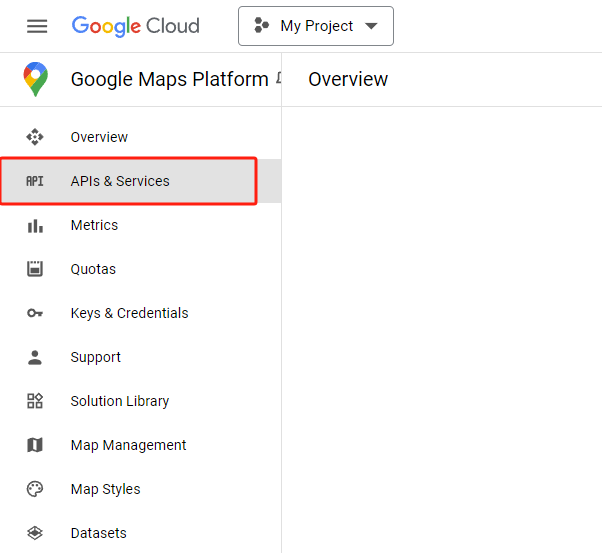

- Click on Library and search for `Street View Static API`.

- Click `Enable` to turn on the API for your project.

  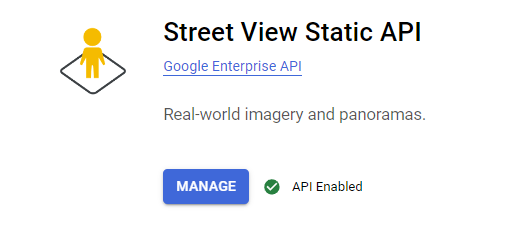


### Get Your API Key

- Go to the `APIs & Services` → `Credentials` section.

  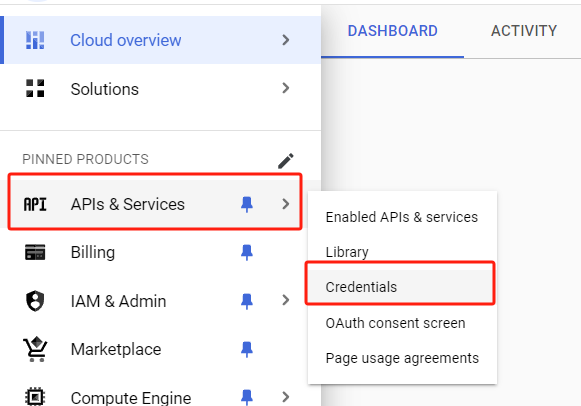

- Click Create Credentials and select API Key.

- This key will be used to authenticate your requests to the API. <span style="color:red"> <strong>Keep it safe </strong></span>!


## Part 2: Using the Google Street View Static API

- The Street View Static API allows you to request images by specifying parameters such as location, heading (direction), field of view, and more.

- [official documents](https://developers.google.com/maps/documentation/streetview/request-streetview)

### URL Format

The base URL for the Google Street View Static API is:

```bash
https://maps.googleapis.com/maps/api/streetview
```


### Key Parameters

1. `size`: Defines the image size in pixels. The maximum resolution is `640x640`. You can specify custom dimensions like 600x400.

   - Example: `size=600x400`

2. `location`: Specifies the location from which to get the Street View image. This can be either a latitude/longitude value or a textual address.

   - Example: `location=40.689247,-74.044502` (Statue of Liberty)
   - Example: `location=Times Square, New York`

3. `heading`: Defines the compass heading for the camera in degrees from 0 to 360. 0 points north, 90 is east, and so on.

   - Example: `heading=90`

4. `fov (Field of View)`: Specifies the field of view of the image. The default is 90 degrees, and the maximum is 120. Smaller values zoom in more.

   - Example: `fov=90`

5. `pitch`: Adjusts the angle of the camera. The default is 0, but you can tilt the camera up to 90 degrees or down to -90 degrees.

   - Example: `pitch=-20` (tilt the camera downward)

6. `key`: Your API key, which authenticates your request.

   - Example: `key=YOUR_API_KEY`

7. `source` (Optional): Restricts results to specific imagery. You can specify outdoor if you only want outdoor imagery.
   - Example: `source=outdoor`


### Complete Example URL

Here's a complete example URL with parameters:

```bash
https://maps.googleapis.com/maps/api/streetview?size=600x400&location=40.689247,-74.044502&heading=151.78&pitch=-0.76&fov=90&key=YOUR_API_KEY
```


### Part 3: Python Code to Download Street View Images

- Let’s now write Python code to download Street View images based on a list of locations.


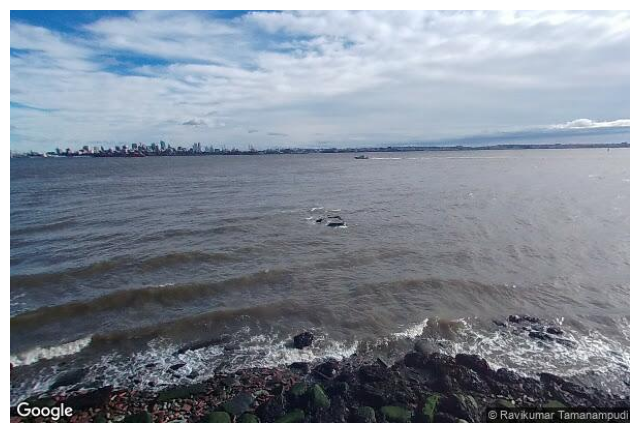

In [1]:
import os
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Read the API key from system environment variable 'street_view_api'
API_KEY = os.getenv('street_view_api')

# Function to download and display Street View images
def download_and_display_street_view_image(location, heading, fov, pitch):
    base_url = "https://maps.googleapis.com/maps/api/streetview"
    
    # Define parameters
    params = {
        'size': '600x400',  # Image size
        'location': location,  # Location (lat, long or address)
        'heading': heading,  # Camera direction
        'fov': fov,  # Field of view
        'pitch': pitch,  # Camera tilt
        'key': API_KEY  # Your API key from the environment variable
    }
    
    # Make the request
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        # Open the image using PIL
        img = Image.open(BytesIO(response.content))
        
        # Plot the image using matplotlib
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Failed to download image. HTTP status code: {response.status_code}")

# Example usage in Jupyter Notebook
location = "40.689247,-74.044502"  # Statue of Liberty
heading = 151.78  # Camera heading
fov = 90  # Field of view
pitch = -0.76  # Camera pitch

# Download and display the image
download_and_display_street_view_image(location, heading, fov, pitch)